<a href="https://colab.research.google.com/github/anandtushar111/MNIST-using-KNN/blob/master/KNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recognising handwritten digits on MNIST Datasets using KNN**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Step 1. Data Representation**

In [0]:
!wget https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/5.%20K-Nearest%20Neighbours/train.csv

In [0]:
df = pd.read_csv('/content/train.csv')
print(df.shape)

(42000, 785)


In [0]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [0]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [0]:
X = data[:,1:]
Y = data[:,0]
print(X.shape, Y.shape)

(42000, 784) (42000,)


In [0]:
split = int(0.8 * X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


**Step 2. KNN**

1


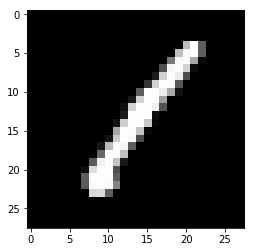

In [0]:
# Visualize some samples

def drawImg(sample):
  img = sample.reshape((28,28))
  plt.imshow(img, cmap ='gray')
  plt.show()
  
print(Y_train[0])
drawImg(X_train[0])


In [0]:
#Can we apply KNN to this data?

In [0]:
def dist(xy1,xy2):
  return np.sqrt(sum((xy1-xy2)**2))


def knn(X,Y,query_point,k=5):
  
  vals =[]
  m=X.shape[0]
  
  for i in range(m):
    d = dist(query_point,X[i])
    vals.append((d,Y[i]))
    
    
  #Nearest/First K Points
  vals = sorted(vals)
  vals = vals[:k]
  vals = np.array(vals)
  #print(vals)
                
  new_vals = np.unique(vals[:,1],return_counts = True)
  index = new_vals[1].argmax()
  pred = new_vals[0][index]             
  #print(new_vals)
  return pred
  

**Step 3. Make Prediction**

In [0]:
pred = knn(X_train,Y_train,X_test[10])
print(int(pred))

3


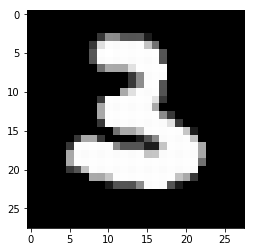

3


In [0]:
drawImg(X_test[10])
print(Y_test[10])

**Step 4. Acuuracy**

In [0]:
acc = 0.0
for i in range(X_test.shape[0]):
  if(Y_test[i] == knn(X_train,Y_train,X_test[i])):
    acc += 1
    
print(acc/X_test.shape[0])